### Generating Overfit Tree Models

By default, you scikitlearn tree models will grow until every node is pure.  To explore this, you are to build different models using the `max_depth` parameter and determine when the tree begins to overfit the data.  For depths from `max_depth = 1` until the tree is completed, keep track of the accuracy on training vs. test data and generate a plot with depths as the horizontal axis and accuracy as the vertical axis for train and test data.  

Repeat this process with different splits of the data to determine at what depth the tree begins to overfit.  Share your results with your peers and discuss your approach to generating the visualization.  What are the consequences of this overfitting for your approach to building Decision Trees?   We provide a small dataset with health data where your goal is to predict whether or not the individuals survive.

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#df = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/winequality-red.csv', sep = ',')

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/Whickham.txt')

In [ ]:
data.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [ ]:
#Convert categorical feature to numeric
data['smoker']=data['smoker'].map({'Yes': 1, 'No': 0})
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   int64 
 2   age      1314 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 30.9+ KB


In [ ]:
#Define X features and y target
X = data[['smoker', 'age']]
y = data['outcome']

In [ ]:
#Split the data into train and test sets, with 30% test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

(919, 2) (919,)
(395, 2) (395,)
0.8476605005440696


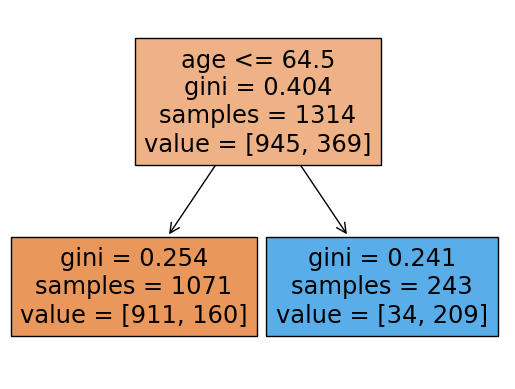

In [ ]:
#Baseline decision tree and accuracy scores
acc_depth_1 = DecisionTreeClassifier(max_depth=1).fit(X_train, y_train).score(X_train, y_train)
tree_plot = plot_tree(tree1, feature_names=list(X.columns), filled = True)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(acc_depth_1)

In [ ]:
#Build a loop to test different tree depths and compute accuracy scores, then put them in a dataframe
scores=[]
train_i_acc=[]
test_i_acc=[]
for i in range(1,10):
    tree_i=(DecisionTreeClassifier(max_depth=i).fit(X_train, y_train))
    tree_i_train_acc=tree_i.score(X_train, y_train)
    tree_i_test_acc=tree_i.score(X_test, y_test)
    scores.append({'depth': i, 'tree_i_train_acc': tree_i_train_acc, 'tree_i_test_acc': tree_i_test_acc})
scores_df = pd.DataFrame(scores)
scores_df.head(10)

,depth,tree_i_train_acc,tree_i_test_acc
0,1,0.847661,0.863291
1,2,0.847661,0.863291
2,3,0.847661,0.858228
3,4,0.848749,0.863291
4,5,0.856366,0.865823
5,6,0.856366,0.865823
6,7,0.856366,0.865823
7,8,0.856366,0.865823
8,9,0.856366,0.865823


Text(0.5, 1.0, 'Train/Test Split 70/30')

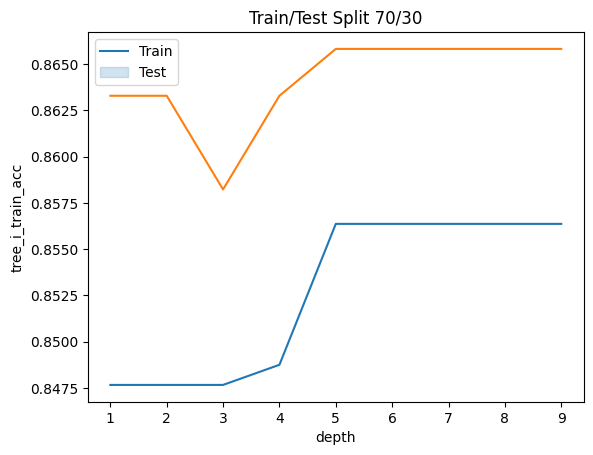

In [ ]:
#Plot values
sns.lineplot(data=scores_df, x='depth', y='tree_i_train_acc')
sns.lineplot(data=scores_df, x='depth', y='tree_i_test_acc')
plt.legend(['Train', 'Test'])
plt.title('Train/Test Split 70/30')

(1051, 2) (1051,)
(263, 2) (263,)
0.851569933396765


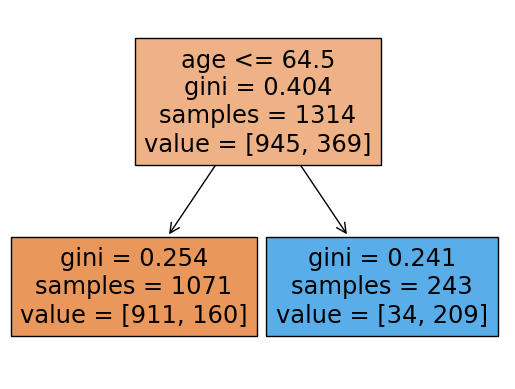

In [ ]:
#Repeat using a different split, this time 20% test data
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.2, random_state=42)
acc2_depth_1 = DecisionTreeClassifier(max_depth=1).fit(X2_train, y2_train).score(X2_train, y2_train)
tree2_plot = plot_tree(tree1, feature_names=list(X.columns), filled = True)
print(X2_train.shape, y2_train.shape)
print(X2_test.shape, y2_test.shape)
print(acc2_depth_1)

In [ ]:
#Build a loop to test different tree depths and compute accuracy scores, then put them in a dataframe
scores2=[]
train2_i_acc=[]
test2_i_acc=[]
for i in range(1,10):
    tree2_i=(DecisionTreeClassifier(max_depth=i).fit(X2_train, y2_train))
    tree2_i_train_acc=tree2_i.score(X2_train, y2_train)
    tree2_i_test_acc=tree2_i.score(X2_test, y2_test)
    scores2.append({'depth': i, 'tree2_i_train_acc': tree2_i_train_acc, 'tree2_i_test_acc': tree2_i_test_acc})
scores2_df = pd.DataFrame(scores2)
scores2_df.head(10)

,depth,tree2_i_train_acc,tree2_i_test_acc
0,1,0.851570,0.855513
1,2,0.851570,0.855513
2,3,0.851570,0.855513
3,4,0.851570,0.855513
4,5,0.852521,0.859316
5,6,0.861085,0.855513
6,7,0.861085,0.855513
7,8,0.861085,0.855513
8,9,0.861085,0.855513


Text(0.5, 1.0, 'Train/Test Split 80/20')

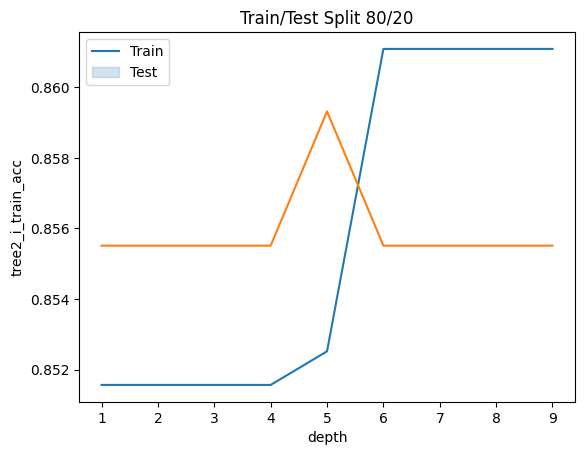

In [ ]:
#Plot values
sns.lineplot(data=scores2_df, x='depth', y='tree2_i_train_acc')
sns.lineplot(data=scores2_df, x='depth', y='tree2_i_test_acc')
plt.legend(['Train', 'Test'])
plt.title('Train/Test Split 80/20')

0.8464467005076142


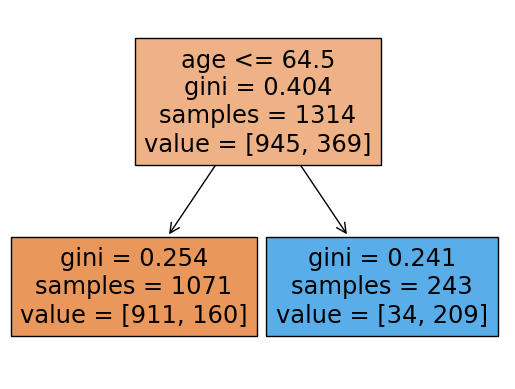

In [ ]:
#Repeat using a different split, this time 40% test data
X3_train, X3_test, y3_train, y3_test = train_test_split(X, y, test_size=0.4, random_state=42)
acc3_depth_1 = DecisionTreeClassifier(max_depth=1).fit(X3_train, y3_train).score(X3_train, y3_train)
tree3_plot = plot_tree(tree1, feature_names=list(X.columns), filled = True)
print(acc3_depth_1)

In [ ]:
#Build a loop to test different tree depths and compute accuracy scores, then put them in a dataframe
scores3=[]
train3_i_acc=[]
test3_i_acc=[]
for i in range(1,10):
    tree3_i=(DecisionTreeClassifier(max_depth=i).fit(X3_train, y3_train))
    tree3_i_train_acc=tree3_i.score(X3_train, y3_train)
    tree3_i_test_acc=tree3_i.score(X3_test, y3_test)
    scores3.append({'depth': i, 'tree3_i_train_acc': tree3_i_train_acc, 'tree3_i_test_acc': tree3_i_test_acc})
scores3_df = pd.DataFrame(scores3)
scores3_df.head(10)

,depth,tree3_i_train_acc,tree3_i_test_acc
0,1,0.846447,0.861217
1,2,0.846447,0.861217
2,3,0.846447,0.857414
3,4,0.847716,0.861217
4,5,0.854061,0.844106
5,6,0.859137,0.855513
6,7,0.861675,0.836502
7,8,0.862944,0.834601
8,9,0.862944,0.834601


Text(0.5, 1.0, 'Train/Test Split 60/40')

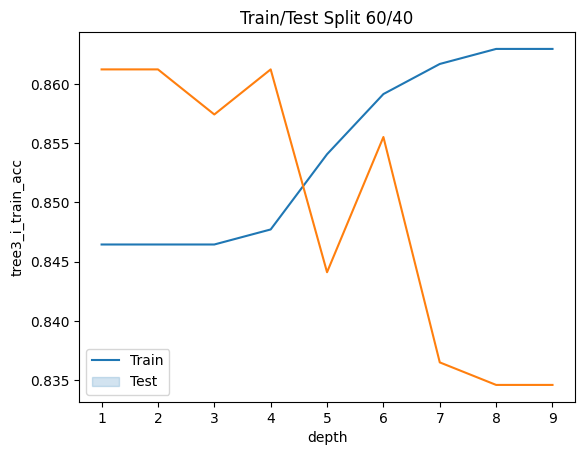

In [ ]:
#Plot values
sns.lineplot(data=scores3_df, x='depth', y='tree3_i_train_acc')
sns.lineplot(data=scores3_df, x='depth', y='tree3_i_test_acc')
plt.legend(['Train', 'Test'])
plt.title('Train/Test Split 60/40')

**Summary of findings**

I first converted the categorical feature 'smoker' to numeric (target variables can remain categorical). Then I defined the X features and the y target variable. I split the dataset into 70% train/30% test  to begin with, fit a baseline decision tree using random state = 42. Then I computed accuracy scores for the train and test datasets. Then I built a loop to test different tree depths and compute accuracy scores, then output them in a dataframe and plotted them. Then I repeated the whole analysis for train/test splits of 80/20 and 60/40. Results are summarized below.

Accuracy scores for the baseline decision trees with a depth of 1 show that accuracy increases as the size of the training set increases, which makes sense:

Train/Test Split	& 	Accuracy

80/20	-	.85156

70/30	-	.84766

60/40	-	.84644

The plots show that the trees begin to overfit after depth = 4, and that is most clearly shown in the fit using 80% training data, which also makes sense. The plot for the 70/30 split didn't make sense to me, as the test data never achieved the same accuracy as the training data. Perhaps this is where the random state has an impact.

My takeaway from this exercise is that decision trees benefit from larger training sets, so using a split of 80/20 will yield higher accuracy and a clearer indication of where overfitting kicks in.